In [1]:
# Ejemplo clustering jerárquico

In [2]:
# Importo librerías
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Defino una función para representar el dendograma
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    fig = plt.figure(figsize=(20,3))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [4]:
# Generación de datos sintéticos
X, y = make_blobs(centers=3, random_state=2, n_samples=200)

In [5]:
X

array([[ -0.54716597,  -2.02428756],
       [ -1.44680389,  -3.79340964],
       [ -0.04435326,  -3.70913162],
       [ -0.78216181,  -9.35497119],
       [ -0.34419366,  -4.63903013],
       [  0.02844902,  -2.68062031],
       [  2.78584241,  -1.72256547],
       [ -0.66876118,  -9.43350477],
       [ -0.44778858,  -3.54542127],
       [ -1.46957122,  -9.55869403],
       [ -0.88505109,  -3.2792497 ],
       [ -0.22817961,   0.51092449],
       [ -1.5948504 ,  -3.53259546],
       [ -0.89962999,  -9.69861063],
       [  0.08713347,  -8.26358973],
       [ -2.76256743,  -8.63516347],
       [ -0.85715442,  -0.96306408],
       [ -0.80358431,  -5.01497738],
       [ -0.07381757,  -1.94648329],
       [ -2.42715917,  -4.39026327],
       [ -0.99282353,  -2.84391911],
       [ -0.48199868,  -3.76664239],
       [ -0.72180319,  -2.80049678],
       [ -1.69599613,  -2.54495301],
       [ -0.84660563,  -8.20309613],
       [ -1.80134759,  -3.25568559],
       [ -1.48269295,  -5.3068268 ],
 

In [6]:
y

array([2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0,
       1, 1])

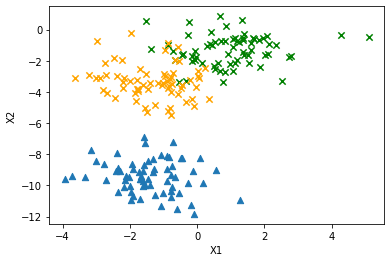

In [7]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^") 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Clase Y=2", c="orange", marker="x")
plt.xlabel("X1") 
plt.ylabel("X2") 
plt.show()

In [8]:
# Ajusto el clustering sólamente a los datos X
dfX = pd.DataFrame(X, columns=['X1', 'X2'])
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=0)
cluster.fit(dfX)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

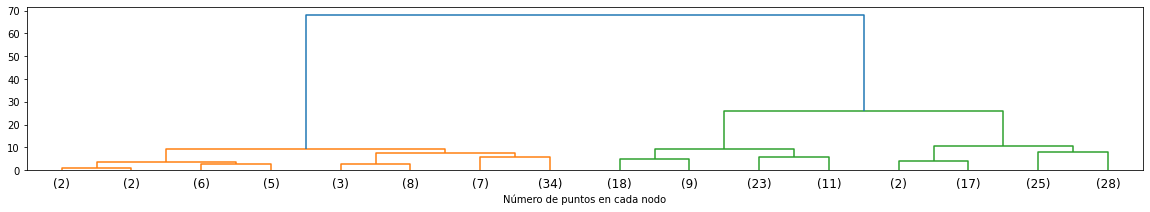

In [9]:
# Represento el dendograma
plot_dendrogram(cluster, truncate_mode='level', p=3)
plt.xlabel(u"Número de puntos en cada nodo")
plt.show()


In [10]:
# Fuerzo a que haya 3 clústers
dfX = pd.DataFrame(X, columns=['X1', 'X2'])
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', distance_threshold=None)
cluster.fit(dfX)

AgglomerativeClustering(n_clusters=3)

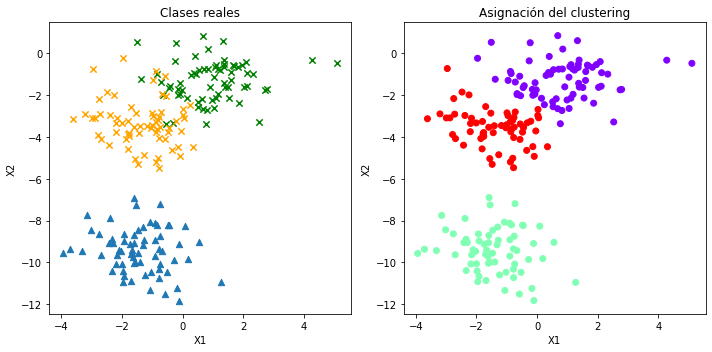

In [11]:
# Representaciones
plt.figure(figsize=(10, 5))
# Represento las clases reales
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^") 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Clase Y=2", c="orange", marker="x")
plt.xlabel("X1") 
plt.ylabel("X2")
plt.title("Clases reales")

# Represento el resultado del clústering con k=3
plt.subplot(122)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(u"Asignación del clustering")
plt.tight_layout()
plt.show()